<a href="https://colab.research.google.com/github/cheysreylin/Machinelearning/blob/main/Final_Project_StockPrice_Using_SVR(CheySreylin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


In [2]:
from google.colab import files 
file = files.upload()

Saving prices.csv to prices.csv


In [3]:
dataset = pd.read_csv("prices.csv")
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
5,2020-02-03,71.544998,71.699997,71.265503,71.496498,71.496498,0
6,2020-02-04,71.314102,71.514999,71.084999,71.314102,71.314102,0
7,2020-02-05,71.100403,71.279999,71.099899,71.099998,71.099998,0
8,2020-02-06,71.181000,71.397499,71.121002,71.180000,71.180000,0
9,2020-02-07,71.470001,71.570999,71.177498,71.470001,71.470001,0


In [4]:
dataset.isnull().sum() / len(dataset)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [5]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# Assign X and Y variable and reshape
x_variable = ['Open', 'High', 'Low', 'Volume']
y_variable = ['Adj Close']

# reshape variable 
x = dataset[x_variable].values.reshape(-1,4)
y = dataset[y_variable].values.reshape(-1,1)

print(x.shape)
print(y.shape)

(262, 4)
(262, 1)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 63/len(dataset), random_state = 1)

print(x_train.shape)
print(x_test.shape)

(199, 4)
(63, 4)


# **kernel types : Linear**

In [8]:
lin_SVR = SVR(kernel = 'linear', C = 1000.0).fit(x_train, y_train)
lin_SVR_predicted = lin_SVR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


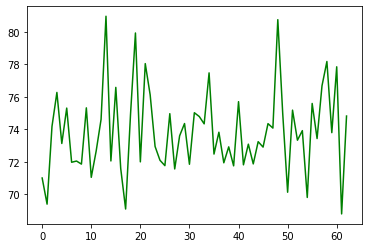

In [9]:
plt.plot(lin_SVR_predicted, color = "green")

In [10]:
from sklearn.metrics import accuracy_score
result1 = lin_SVR.score(x_test, y_test)
print("The accuracy in Linear:", result1)

The accuracy in Linear: -0.8390482760284712


# **kernel types : Polynomial**

In [11]:
poly_SVR = SVR(kernel = 'poly', C = 1000.0, degree = 2).fit(x_train, y_train)
poly_SVR_predicted = poly_SVR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


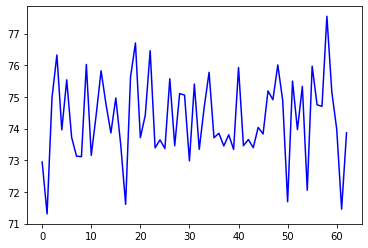

In [12]:
plt.plot(poly_SVR_predicted, color = "blue")

In [13]:
from sklearn.metrics import accuracy_score
result2 = poly_SVR.score(x_test, y_test)
print("The accuracy in Poly:", result2)

The accuracy in Poly: 0.9748249116542655


# **kernel types : Radial basis function (RBF)**

In [14]:
rbf_SVR = SVR(kernel = 'rbf', C = 1000.0, gamma = 0.85).fit(x_train, y_train)
rbf_SVR_predicted = rbf_SVR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


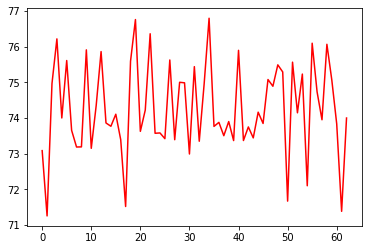

In [15]:
plt.plot(rbf_SVR_predicted, color = "red")

In [16]:
from sklearn.metrics import accuracy_score
result3 = rbf_SVR.score(x_test, y_test)
print("The accuracy in RBF:", result3)

The accuracy in RBF: 0.9139687897134096


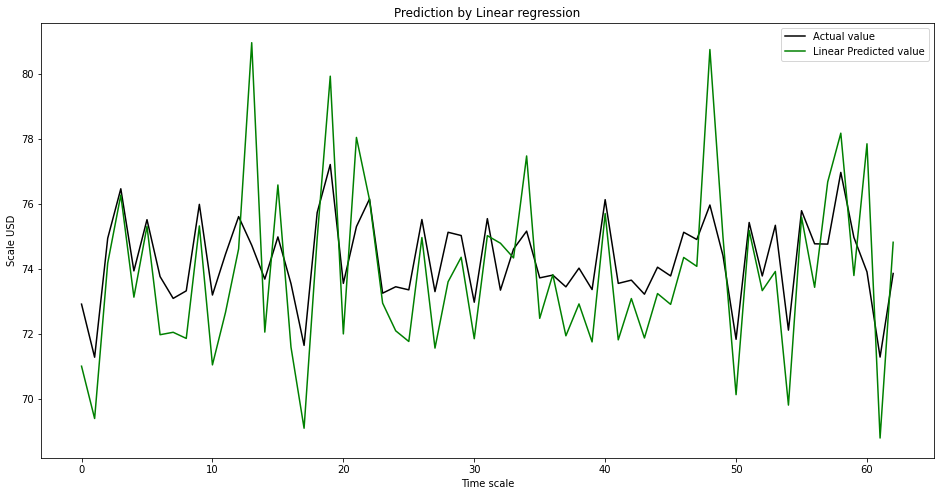

In [18]:
plt.figure(figsize = (16,8))
# Plot between predicted value and True value
plt.plot(y_test, label = "Actual value", color ="black")
plt.plot(lin_SVR_predicted, label = "Linear Predicted value", color ="green")
# plt.plot(poly_SVR_predicted, label = "Poly Predicted value", color ="blue")
# plt.plot(rbf_SVR_predicted, label = "RBF Predicted value", color ="red")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()